In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from nis2pyr.reader import read_nd2file

In [5]:
import nd2
with nd2.ND2File('/group/jug/ashesh/data/nikola_data/raw/uSplit_14022025_highSNR.nd2') as nd2file:
    data = read_nd2file(nd2file)

ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False


In [6]:
data.shape

(1, 20, 1, 19, 1608, 1608, 1)

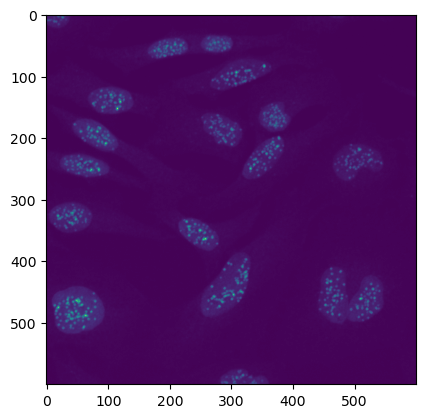

In [11]:
import matplotlib.pyplot as plt
plt.imshow(data[0,0,0,3,...,400:1000,400:1000, 0])

In [ ]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"
DEBUG=False

In [ ]:
%run ../nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ../nb_core/disentangle_imports.ipynb

In [ ]:
from nd2reader import ND2Reader

fpath = '/group/jug/ashesh/data/nicola_data/uSplit_14022025_highSNR.nd2'
with ND2Reader(fpath) as fobj:
    print(fobj)

In [ ]:
[key for key in fobj.metadata.keys()]

In [ ]:
fobj.metadata['channels']

In [ ]:
def load_one_file(fpath):
    """
    '/group/jug/ashesh/data/pavia3_sequential/Cond_2/Main/1_002.nd2'
    """
    output = []
    with ND2Reader(fpath) as fobj:
        for c in range(len(fobj.metadata['channels'])):
            output.append([])
            for v in fobj.metadata['fields_of_view']:
                img = fobj.get_frame_2D(c=c, v=v)
                img = img[None, ..., None]
                output[c].append(img)
            output[c] = np.concatenate(output[c], axis=0)
    return np.concatenate([output[i], axis=-1)


In [ ]:
data = load_one_file(fpath)

In [ ]:
data.shape

In [ ]:
fobj.metadata['channels']